# Assignment Details

The below code was used in tandem with a PowerPoint to demonstrate the usefulness of analytics. The PowerPoint focused primarily on what a predictive model is and a few examples of different models that can be used. The code was used as a live demonstration to reinforce that models can much more accurately and reliably predict outcomes using data than humans can

https://www.kaggle.com/dansbecker/aer-credit-card-data
## Context
A small credit card dataset for simple econometric analysis,
## Content
card: Dummy variable, 1 if application for credit card accepted, 0 if not

reports: Number of major derogatory reports

age: Age n years plus twelfths of a year

income: Yearly income (divided by 10,000)

share: Ratio of monthly credit card expenditure to yearly income

expenditure: Average monthly credit card expenditure

owner: 1 if owns their home, 0 if rent

selfempl: 1 if self employed, 0 if not.

dependents: Number of dependents

months: Months living at current address

majorcards: Number of major credit cards held

active: Number of active credit accounts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interactive

In [2]:
data = pd.read_csv("AER_credit_card_data.csv")
data

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


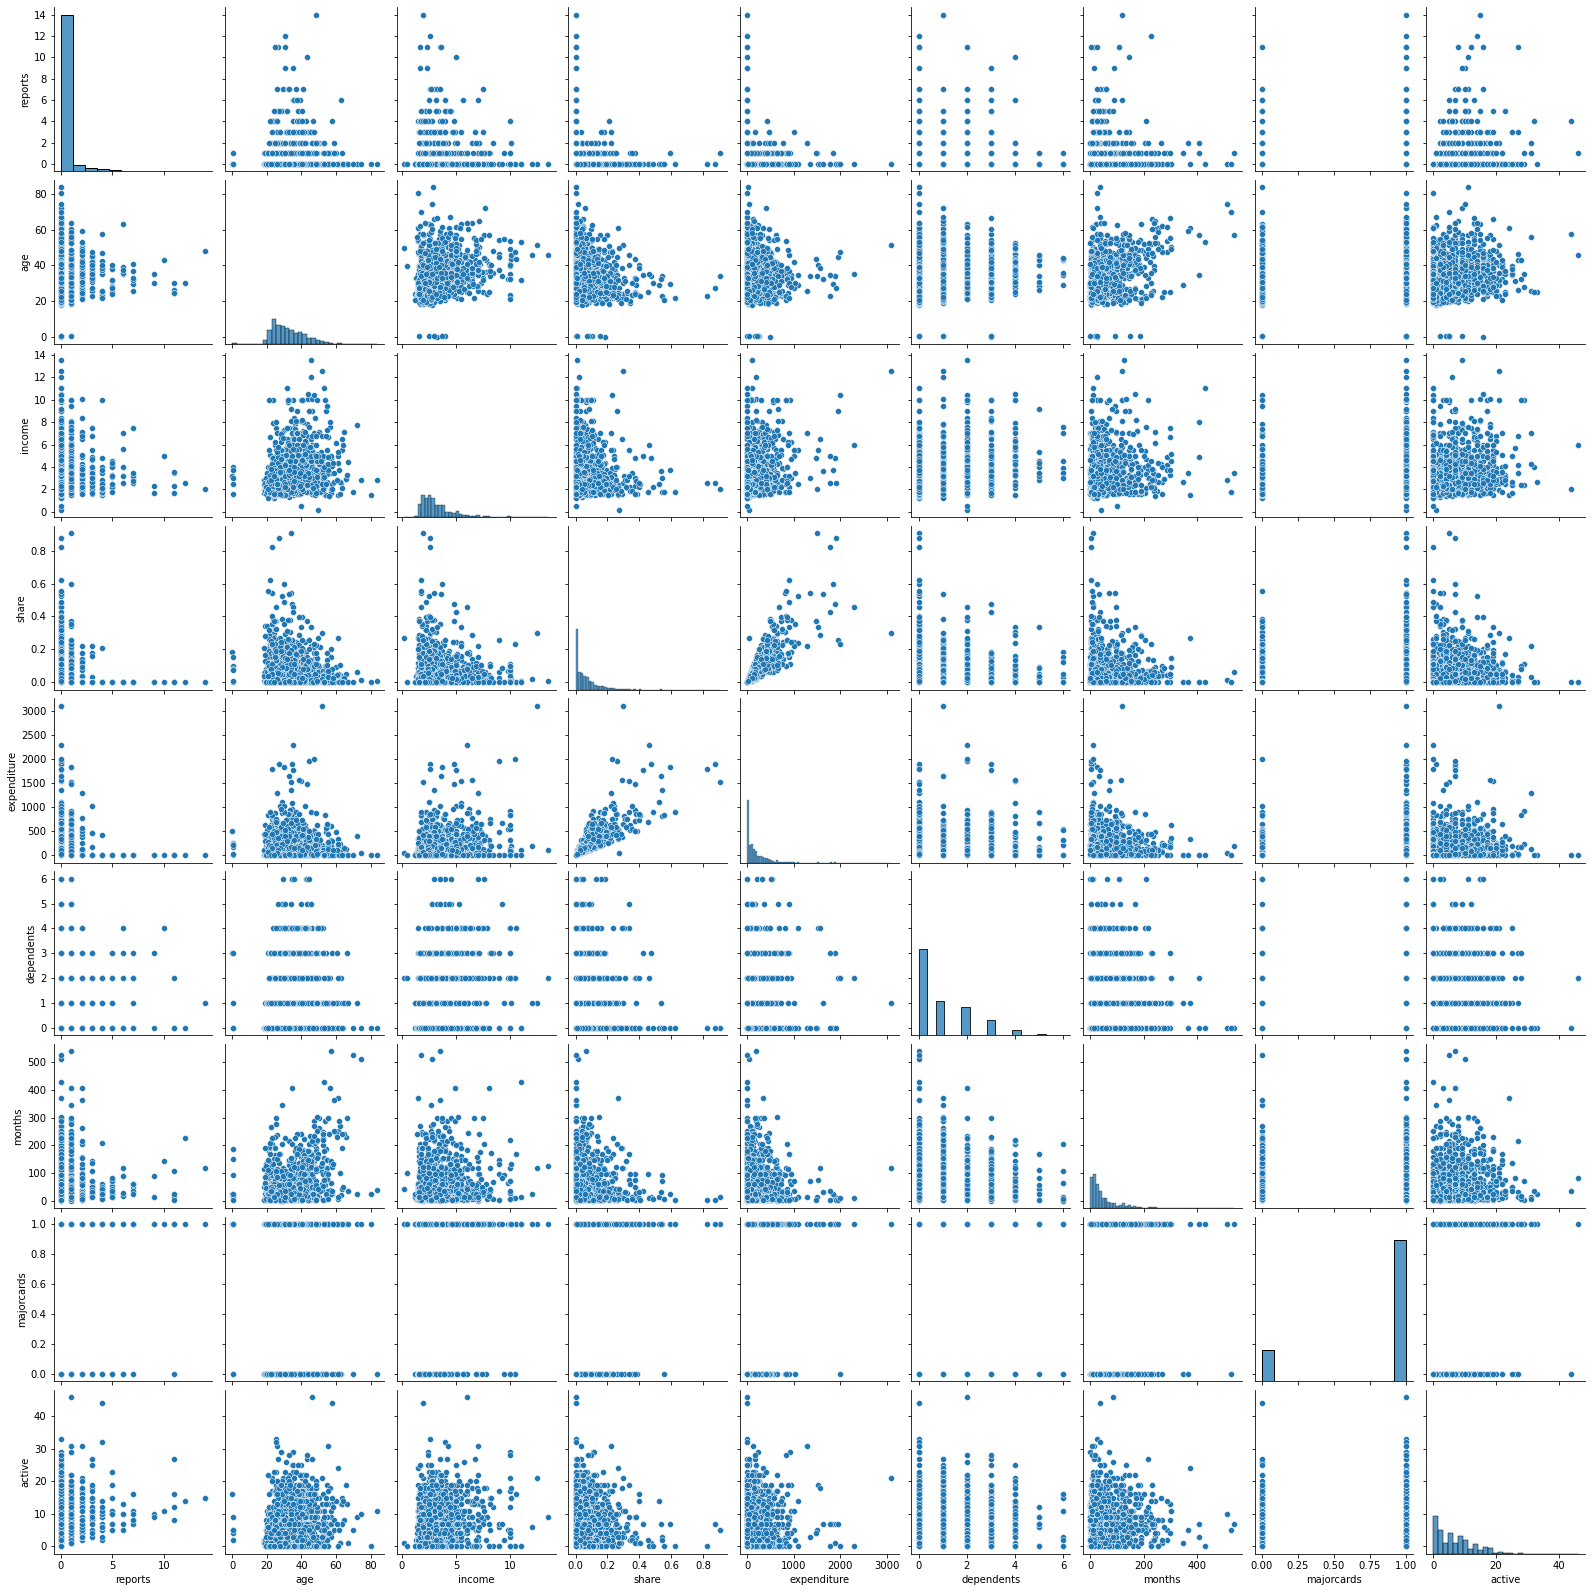

In [3]:
sns.pairplot(data=data)

In [4]:
data = data.replace(['yes','no'],[1,0])
data = data[data['age'] >= 18]
x = data[['reports','age','income','share','expenditure','owner','selfemp','dependents','months','majorcards','active']]

In [5]:
card_data = data.groupby('card')['reports'].count()
card_accept_reports = data.filter(like='1', axis=0).groupby('reports')['card'].count()
card_accept_reports.drop(labels=11, inplace=True)
datacolumns=['card','reports','age','income','share','expenditure','owner','selfemp','dependents','months','majorcards','active']

In [6]:
y = data['card']

In [7]:
def generate_card_data_plots(column='card'):
    if (column=='selfemp'):
        chart='pie'
        label = ['Not Self-Employed', 'Self-Employed']
    elif (column=='owner'):
        chart='pie'
        label = ['Renter', 'Owner']
    elif (column=='card'):
        plt.pie(card_data,
        explode=(0,.1),
        labels = ['Denied', 'Accepted'],
        colors = ('tab:red', 'tab:blue'),
        textprops={'size': 'large', 'color':'k', 'weight':'bold'},
        autopct='%.1f%%',
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': .5,
                      'antialiased': True}
       )
        plt.show()
        return
    elif (column=='majorcards'):
        chart='pie'
        label = ['0','1']
        
    elif (column=='reports'):
        fig, ax = plt.subplots(figsize=(7,4))
        bar1 = ax.bar(height=data.filter(like='0', axis=0).groupby(column)['card'].count(), x=np.array([0,1,2,3,4,5,6,7,9,10]), width=-.4, color='tab:red', align='edge', edgecolor='black')
        bar2 = ax.bar(height=card_accept_reports, x=np.array([0,1,2,3,4,5,6,7,9,10])+.2, width=.4, color='tab:blue', edgecolor='black')
        ax.legend((bar1[0], bar2[0]), ('Declined', 'Accepted'))
        ax.set_ylabel('Applicants')
        ax.set_xlabel('Number of Reports')
        ax.set_title('Reports per Application')
        ax.set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10])
        ax.set_yticks(ticks=[0,50,100,150,200,250,300,350,400,450,500])
        plt.show()
        return

    elif (column == 'dependents'):
        chart = 'bar'
        
    elif (column == 'active'):
        chart='hist'
        xlab = 'Ratio of monthly credit card expenditure to yearly income'
        ylab = 'Applicants'
        range=(0,45)
        ticks=[0,20,40,60,80,100,120,140,160,180]
    
    elif (column == 'age'):
        chart='hist'
        xlab = 'Ratio of monthly credit card expenditure to yearly income'
        ylab = 'Applicants'
        range=(15,75)
        ticks=[0,10,20,30,40,50,60,70,80,90]
        
    elif (column == 'income'):
        chart='hist'
        xlab = 'Ratio of monthly credit card expenditure to yearly income'
        ylab = 'Applicants'
        range=(0,14)
        ticks=[0,20,40,60,80,100,120,140,160]
        
    elif (column == 'share'):
        chart='hist'
        range=(0,.9)
        xlab = 'Ratio of monthly credit card expenditure to yearly income'
        ylab = 'Applicants'
        ticks=[0,50,100,150,200,250,300,350]
        
    elif (column == 'expenditure'):
        chart='hist'
        xlab = 'Ratio of monthly credit card expenditure to yearly income'
        ylab = 'Applicants'
        ticks=[0,50,100,150,200,250,300]
        range=(0,2000)
        
    elif (column == 'months'):
        chart='hist'
        xlab = 'Months Living at Current Address'
        ylab = 'Applicants'
        ticks=[0,50,100,150,200,250]
        range=(0,450)
     
    if (chart == 'pie'):
        fig = plt.figure(figsize = (7,7))
        ax1 = fig.add_axes([0.1, 0.1, 0.4, 0.7])
        ax2 = fig.add_axes([.8,.1,.4,.7])

        pie1 = ax1.pie(data.filter(like='0', axis=0).groupby(column)['card'].count(),
                explode=(0,.1),
                labels = label,
                colors = ('tab:red', 'tab:blue'),
                textprops={'size': 'large', 'color':'k', 'weight':'bold'},
                autopct='%.1f%%',
                wedgeprops = {"edgecolor" : "black",
                              'linewidth': .5,
                              'antialiased': True}
               )
        pie1 = ax2.pie(data.filter(like='1', axis=0).groupby(column)['card'].count(),
                explode=(0,.1),
                labels = label,
                colors = ('tab:red', 'tab:blue'),
                textprops={'size': 'large', 'color':'k', 'weight':'bold'},
                autopct='%.1f%%',
                wedgeprops = {"edgecolor" : "black",
                              'linewidth': .5,
                              'antialiased': True},
               )
        ax1.title.set_text("Declined")
        ax2.title.set_text("Accepted")
        plt.show()
        return

    elif (chart=='bar'):
        fig, ax = plt.subplots(figsize=(7,4))
        bar1 = ax.bar(height=data.filter(like='0', axis=0).groupby(column)['card'].count(), x=np.array([0,1,2,3,4,5,6]), width=-.3, color='tab:red', align='edge', edgecolor='black')
        bar2 = ax.bar(height=data.filter(like='1', axis=0).groupby(column)['card'].count(), x=np.array([0,1,2,3,4,5,6])+.15, width=.3, color='tab:blue', edgecolor='black')
        ax.legend((bar1[0], bar2[0]), ('Declined', 'Accepted'))
        ax.set_xlabel('# of Dependents')
        ax.set_title('Dependents per Application')
        ax.set_xticks(ticks=[0,1,2,3,4,5,6])
        plt.show()

    else:
        fig = plt.figure(figsize=(10,5))
        ax1 = fig.add_axes([0.1, 0.1, 0.4, 0.7])
        ax2 = fig.add_axes([.6, .1, .4, 0.7])

        hist1 = ax1.hist(x=data.filter(like='0', axis=0)[column], bins=20, range=range, color='tab:red', edgecolor='black',)

        ax1.title.set_text("Declined Applicants")
        ax1.set_xlabel(xlab)
        ax1.set_ylabel(ylab)
        ax1.set_yticks(ticks=ticks)

        hist2 = ax2.hist(x=data.filter(like='1', axis=0)[column], bins=20, range=range, color='tab:blue', edgecolor='black')

        ax2.title.set_text("Accepted Applicants")
        ax2.set_xlabel(xlab)
        ax2.set_ylabel(ylab)
        ax2.set_yticks(ticks=ticks)

        plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=4)

In [9]:
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [10]:
demo = {'data':{}, 'outcome':{}}
keeping = ['1','2','3','4','390','392']
for key in keeping:
    demo['data'][key] = dict(x_test.loc[int(key)])
    demo['outcome'][key] = y_test.loc[int(key)]

In [11]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn(), np.random.randn(), np.random.randn(), np.random.randn(), np.random.randn(), np.random.randn(), np.random.randn(), np.random.randn(), np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
        
    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )
        
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

In [12]:
neural_network = NeuralNetwork(.2)
neural_network.train(np.array(x_train), np.array(y_train), 100)

[151.04530913787718]

In [13]:
miss = {}
neural_network_results = {}
for i in range(int(x_test.size/11)):
    raw_prediction = neural_network.predict(np.array(x_test.loc[i]))
    if (raw_prediction > .5):
        prediction = 1
    else:
        prediction = 0
    if (str(i) in keeping):
        neural_network_results[str(i)] = prediction
    if (y_test.loc[i] != prediction):
        miss[str(i)] = prediction

In [14]:
count = 0
for key in miss:
    count = count+1
accuracy = (int(x_test.size/11)-count)/int(x_test.size/11)
print(f'Neural Network Testing Accuracy: {round(accuracy,3)*100}%')

Neural Network Testing Accuracy: 77.4%


In [15]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier()
model.fit(x_train , y_train)
print(f"Decision Tree Testing Accuracy : {round(model.score(x_test , y_test),3)*100}%")

Decision Tree Testing Accuracy : 97.5%


In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
print(f"Logistic Regression Testing Accuracy: {round(logreg.score(x_test,y_test),3)*100}%")

Logistic Regression Testing Accuracy: 98.7%


In [17]:
decision_tree_results = {}
for key in keeping:
    sample = np.array(x_test.loc[int(key)])
    sample = sample.reshape(1,-1)
    prediction = model.predict(sample)
    decision_tree_results[key] = int(prediction)

In [18]:
logreg_results = {}
for key in keeping:
    sample = np.array(x_test.loc[int(key)])
    sample = sample.reshape(1,-1)
    prediction = logreg.predict(sample)
    logreg_results[key] = int(prediction)

In [19]:
def yesno(num):
    if int(float(num)) == 0:
        return 'Denied'
    elif int(num)==1:
        return 'Accepted'
    else:
        return 20

In [20]:
for key in demo['outcome']:
    demo['outcome'][key] = yesno(demo['outcome'][key])
    neural_network_results[key] = yesno(neural_network_results[key])
    decision_tree_results[key] = yesno(decision_tree_results[key])
    logreg_results[key] = yesno(logreg_results[key])

In [21]:
def demonstration(loc='1', QnA='data', predictions='hide'):
    if QnA == 'data':
        print(demo[QnA][loc])
    if (QnA == 'outcome'):
        print(f'Application Results: {demo[QnA][loc]}')
    if (predictions == 'show'):
        print('*'*60)
        print(f'Neural Network: {neural_network_results[loc]}')
        print(f'Decision Tree: {decision_tree_results[loc]}')
        print(f'Logistice Regression: {logreg_results[loc]}')

In [22]:
interactive(generate_card_data_plots, column=datacolumns)

interactive(children=(Dropdown(description='column', options=('card', 'reports', 'age', 'income', 'share', 'ex…

In [23]:
interactive(demonstration, loc=keeping, QnA=['data','outcome'], predictions = ['hide','show'])

interactive(children=(Dropdown(description='loc', options=('1', '2', '3', '4', '390', '392'), value='1'), Drop…

# Useful Sites
- https://realpython.com/python-ai-neural-network/#python-ai-starting-to-build-your-first-neural-network

- https://www.section.io/engineering-education/decision-tree-in-python/#:~:text=Decision%20Trees%20in%20Python%20The%20decision%20tree%20is,structure%20in%20presenting%20decisions%20and%20decision%20making%20processes.